In [1]:
print("hello world")

hello world


In [2]:
import os
import pandas as pd

In [3]:


features_df = pd.read_csv('/content/Features data set.csv')
sales_df = pd.read_csv('/content/sales data-set.csv')
stores_df = pd.read_csv('/content/stores data-set.csv')

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Inspect the datasets
print("Features Data:")
print(features_df.head())

print("Sales Data:")
print(sales_df.head())

print("Stores Data:")
print(stores_df.head())

Features Data:
   Store        Date  Temperature  Fuel_Price  MarkDown1  MarkDown2  \
0      1  05/02/2010        42.31       2.572        NaN        NaN   
1      1  12/02/2010        38.51       2.548        NaN        NaN   
2      1  19/02/2010        39.93       2.514        NaN        NaN   
3      1  26/02/2010        46.63       2.561        NaN        NaN   
4      1  05/03/2010        46.50       2.625        NaN        NaN   

   MarkDown3  MarkDown4  MarkDown5         CPI  Unemployment  IsHoliday  
0        NaN        NaN        NaN  211.096358         8.106      False  
1        NaN        NaN        NaN  211.242170         8.106       True  
2        NaN        NaN        NaN  211.289143         8.106      False  
3        NaN        NaN        NaN  211.319643         8.106      False  
4        NaN        NaN        NaN  211.350143         8.106      False  
Sales Data:
   Store  Dept        Date  Weekly_Sales  IsHoliday
0      1     1  05/02/2010      24924.50      Fals

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 17 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         421570 non-null  int64         
 1   Dept          421570 non-null  int64         
 2   Date          421570 non-null  datetime64[ns]
 3   Weekly_Sales  421570 non-null  float64       
 4   IsHoliday_x   421570 non-null  bool          
 5   Type          421570 non-null  object        
 6   Size          421570 non-null  int64         
 7   Temperature   421570 non-null  float64       
 8   Fuel_Price    421570 non-null  float64       
 9   MarkDown1     150681 non-null  float64       
 10  MarkDown2     111248 non-null  float64       
 11  MarkDown3     137091 non-null  float64       
 12  MarkDown4     134967 non-null  float64       
 13  MarkDown5     151432 non-null  float64       
 14  CPI           421570 non-null  float64       
 15  Unemployment  421

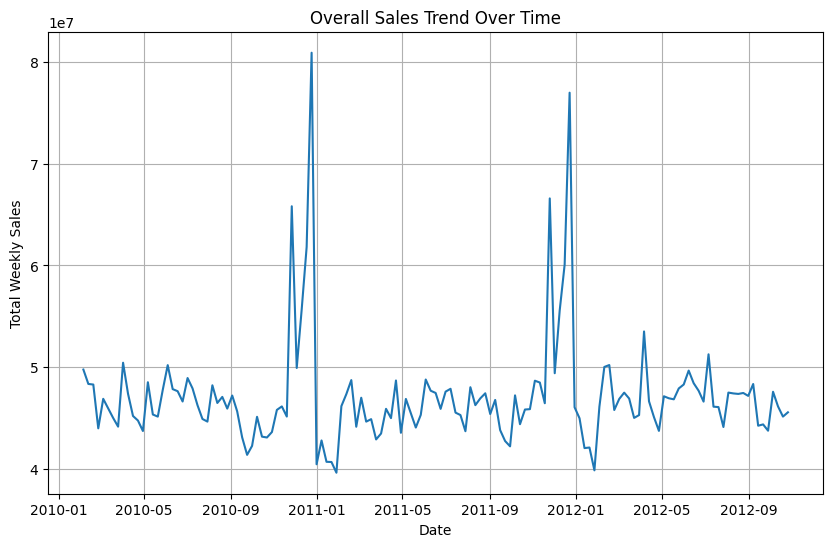

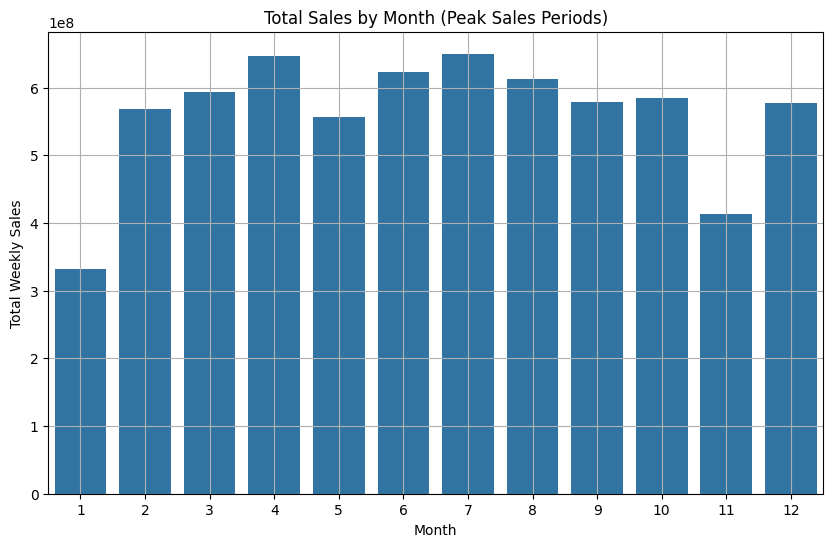

Index(['Store', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday_x', 'Type', 'Size',
       'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3',
       'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment', 'IsHoliday_y', 'Month',
       'Year'],
      dtype='object')


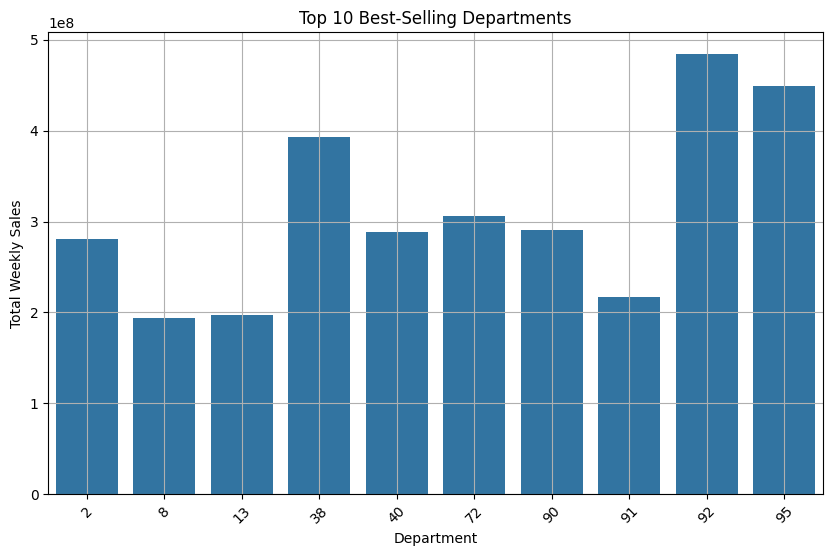

In [8]:
# Merge the datasets on common columns
df = pd.merge(sales_df, stores_df, on='Store', how='left')
df = pd.merge(df, features_df, on=['Store', 'Date'], how='left')

# Convert 'Date' to datetime if necessary

df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)
# Basic data information
print(df.info())

# Checking for missing values
print(df.isnull().sum())

# Step 1: Trend Analysis - Overall sales trend over time
df_grouped_date = df.groupby('Date').agg({'Weekly_Sales': 'sum'}).reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(x='Date', y='Weekly_Sales', data=df_grouped_date)
plt.title('Overall Sales Trend Over Time')
plt.xlabel('Date')
plt.ylabel('Total Weekly Sales')
plt.grid(True)
plt.show()

# Step 2: Peak Sales Periods
# Extracting month and year from the date for seasonality analysis
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year

# Group by month to find peak sales periods
df_grouped_month = df.groupby('Month').agg({'Weekly_Sales': 'sum'}).reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='Month', y='Weekly_Sales', data=df_grouped_month)
plt.title('Total Sales by Month (Peak Sales Periods)')
plt.xlabel('Month')
plt.ylabel('Total Weekly Sales')
plt.grid(True)
plt.show()
print(df.columns)
# Step 3: Popular Products

# Grouping by 'Dept' to find the total weekly sales for each department
df_grouped_dept = df.groupby('Dept').agg({'Weekly_Sales': 'sum'}).reset_index().sort_values(by='Weekly_Sales', ascending=False)

# Plot the top 10 best-selling departments
plt.figure(figsize=(10, 6))
sns.barplot(x='Dept', y='Weekly_Sales', data=df_grouped_dept.head(10))  # Top 10 departments
plt.title('Top 10 Best-Selling Departments')
plt.xlabel('Department')
plt.ylabel('Total Weekly Sales')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

